In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('Datasetok.csv',encoding= 'latin-1', sep=";")

In [3]:
#Lectura del Dataset
df.head()

,Cuenta,Cliente,Localidad,Partido,Región,Medidor,Viviendas,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Unnamed: 19
0,4706234997,1_DE_MAYO,Tortuguitas,Malvinas_Argentinas,Región_3,199685-490,179,44900,41450,37050,37540,62500,88440,86870,86520,67280,50340,39480,39260,NaN
1,9435851244,9_DE_JULIO,Jose_C_Paz,Jose_C_Paz,Región_3,4495128-562,643,5004,4294,4766,5326,8559,12906,13949,13040,9172,6138,5863,6531,NaN
2,6766855234,9_DE_JULIO,Jose_C_Paz,Jose_C_Paz,Región_3,4495127-562,643,6564,5659,5014,4705,6849,10855,12439,12214,8067,5379,5007,5349,NaN
3,4951709577,ABASCAL,Jose_C_Paz,Jose_C_Paz,Región_3,18996254-560,176,15220,14324,17524,17137,26496,35808,38542,38588,27515,21920,19442,19470,NaN
4,4304787167,AGUSTONI,Del_Viso,Pilar,Región_3,4495138-562,286,10230,9514,8633,9629,15565,19895,21914,20312,16071,15250,11943,11817,NaN


In [4]:
#Detallamos Shape
df.shape

(209, 20)

In [5]:
#Mostramos cual es la totalidad de registros por columna
df.count()

Cuenta         209
Cliente        209
Localidad      209
Partido        209
Región         209
Medidor        209
Viviendas      209
Enero          206
Febrero        209
Marzo          209
Abril          209
Mayo           209
Junio          209
Julio          209
Agosto         209
Septiembre     209
Octubre        209
Noviembre      209
Diciembre      209
Unnamed: 19      2
dtype: int64

In [6]:
#Vemos que tipos de datos tenemos
df.dtypes

Cuenta          int64
Cliente        object
Localidad      object
Partido        object
Región         object
Medidor        object
Viviendas       int64
Enero          object
Febrero        object
Marzo          object
Abril          object
Mayo            int64
Junio           int64
Julio           int64
Agosto          int64
Septiembre      int64
Octubre         int64
Noviembre       int64
Diciembre      object
Unnamed: 19    object
dtype: object

In [7]:
#Tenemos una estructura te tipo
type(df)

pandas.core.frame.DataFrame

In [8]:
#Las principales medidas estadisticas son las siguientes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cuenta,209.0,5.367109e+09,2.882664e+09,118975183.0,2.800301e+09,5.566589e+09,7.862644e+09,9.980244e+09
Viviendas,209.0,1.050804e+03,1.289936e+03,26.0,2.250000e+02,3.700000e+02,1.999000e+03,4.713000e+03
Mayo,209.0,8.659845e+04,8.788943e+04,0.0,1.997300e+04,5.085000e+04,1.313270e+05,4.266900e+05
Junio,209.0,1.182131e+05,1.141736e+05,0.0,2.944000e+04,7.708000e+04,1.823160e+05,5.013200e+05
Julio,209.0,1.249917e+05,1.167598e+05,0.0,3.238600e+04,8.293000e+04,2.056800e+05,4.968400e+05
Agosto,209.0,1.209711e+05,1.112186e+05,0.0,3.222200e+04,8.112000e+04,1.890000e+05,4.535500e+05
Septiembre,209.0,9.410430e+04,8.659467e+04,0.0,2.354500e+04,6.580000e+04,1.420700e+05,3.658300e+05
Octubre,209.0,7.328733e+04,6.659157e+04,0.0,1.911400e+04,5.166000e+04,1.109500e+05,2.943700e+05
Noviembre,209.0,6.767849e+04,6.262318e+04,0.0,1.775800e+04,4.791800e+04,1.004010e+05,3.162270e+05


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


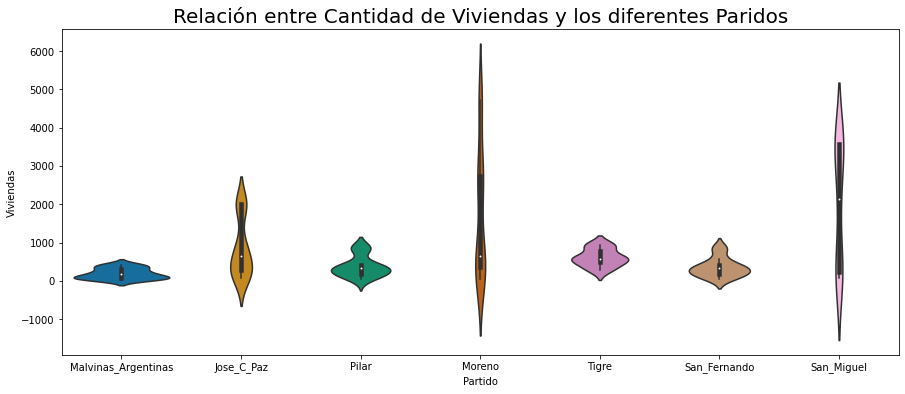

In [12]:
#Observamos la variación de cantidad de viviendas por Municipio.
##Esto lo hacemos para ver de forma gráfica si existe una tendencia entre los municipios y su volumen de Asentamientos.
###Por ejemplo, en Malvinas, Tigre, Pilar y San Fernando vemos una tendencia que asentamientos chicos. No Así en Moreno y San Miguel
plt.rcParams['figure.figsize'] = (15, 6)
sns.violinplot(df['Partido'], df['Viviendas'], palette = 'colorblind')
plt.title('Relación entre Cantidad de Viviendas y los diferentes Paridos', fontsize = 20, fontweight = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


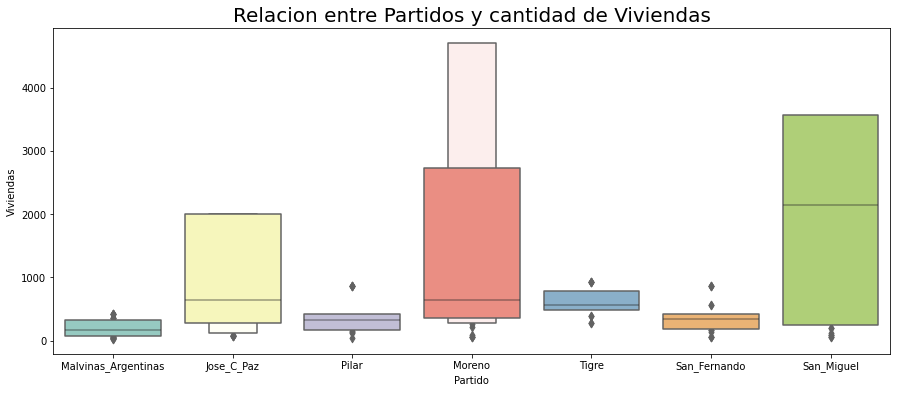

In [10]:
#Misma relación anterior pero con otra gráfica. Fue más que nada para probar otra opción gráfica. A mi criterio, visualizamos más la dispersión de los casos particulares
sns.boxenplot(df['Partido'], df['Viviendas'], palette = 'Set3')
plt.title('Relacion entre Partidos y cantidad de Viviendas', fontsize = 20, fontweight = 30)
plt.show()

In [60]:
#Acá buscamos comparar el consumo de Noviembre (CALOR) y de Mayo (FRIO) entre municipios
##Esto nos podría mostar la tendencia de existencia de gas en ciertos municipios. Problema que existe en el conurbano en invierno, la falta de gas hace que el consumo de luz se eleve.

df_stats = df.groupby(['Partido']).mean()[['Mayo', 'Noviembre']]
df_stats

,Mayo,Noviembre
Partido,,
Jose_C_Paz,60713.108108,60349.054054
Malvinas_Argentinas,38733.333333,23622.633333
Moreno,109026.142857,88359.267857
Pilar,91049.950000,67309.050000
San_Fernando,88713.608696,61330.565217
San_Miguel,117896.285714,84633.892857
Tigre,94847.933333,75237.200000


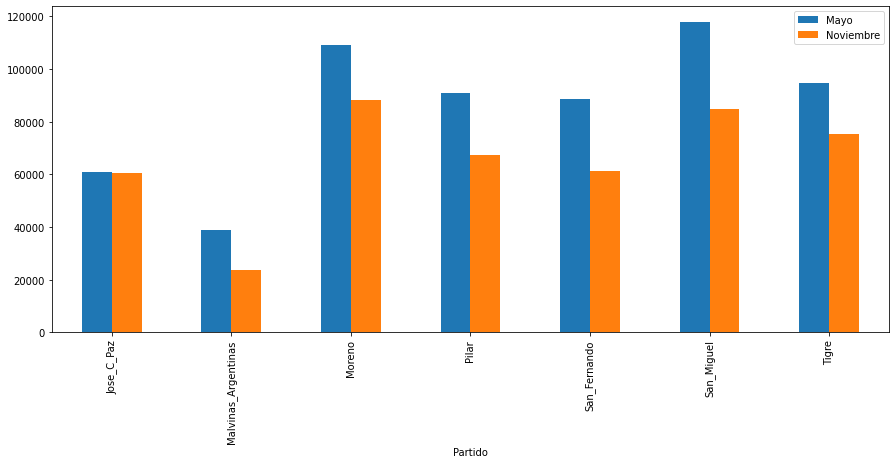

In [62]:
df_stats.plot.bar()

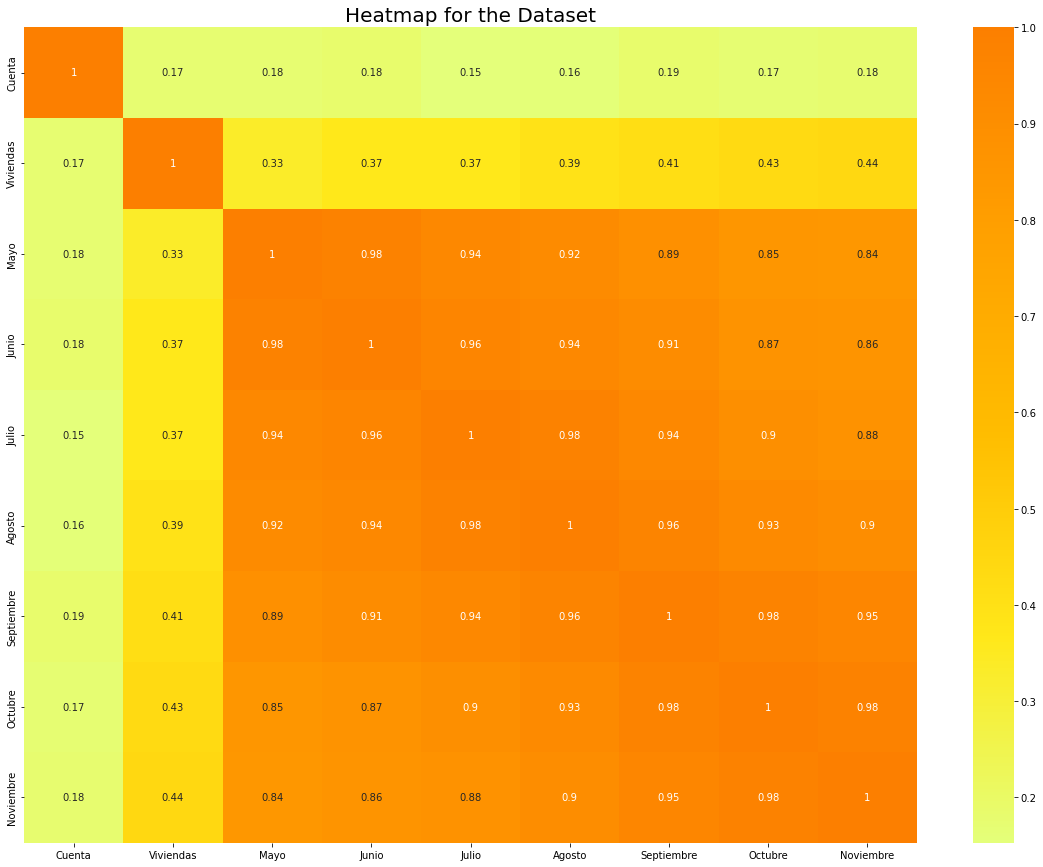

In [ ]:
#Lo utilizamos sólo para ver relaciones entre variables, ejemplo de la clase.
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()